## Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

## Creating a dataframe from the csv file

In [2]:
df = pd.read_csv("02 Churn-Dataset.csv")

In [3]:
df.columns #taking the look of the colummns of the dataframe

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Year', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [4]:
df.head() #having a glance of the data and the columns

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Year,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,1,No,No phone service,DSL,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,3,Yes,No,DSL,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,1,Yes,No,DSL,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,4,No,No phone service,DSL,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,1,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [5]:
df.shape #here is the shape of the data set

(7043, 24)

In [6]:
df.info() #checking the information about the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   Year              7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [7]:
df = df.iloc[:,1:] 
df=df.drop(["tenure","Year","Contract"],axis=1) #droping the unwanted columns
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
2350,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Yes,Electronic check,84.00,424.75,0,0,No
5968,Female,0,No,No,Yes,Yes,DSL,No,No,No,Yes,Yes,Yes,No,Mailed check,74.05,872.65,2,0,Yes
4296,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No,Electronic check,72.25,2568.55,0,3,Yes
2622,Male,1,Yes,Yes,Yes,Yes,DSL,No,No,No,No,No,No,Yes,Electronic check,51.00,1381.8,0,2,No
6865,Female,0,Yes,No,Yes,No,DSL,Yes,No,No,Yes,No,Yes,No,Mailed check,65.50,564.35,0,0,No


In [8]:
df.isnull().sum() #checking out the null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") 
#converting the column to float datatype 
#and converting the empty element to nan values

In [10]:
df.isnull().sum() #agin checking the value which is na in the df

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [11]:
df = df.dropna() #droping the na value

In [12]:
df.duplicated().sum() #checking the duplicate value in the dataframe

18

In [13]:
df = df.drop_duplicates() #droping the duplicate value in the dataframe

In [14]:
df.shape

(7014, 20)

In [15]:
#replacing the value NO phone service to NO
for column in df.columns:
    # Access and modify values in each column
    df[column] = df[column].apply(lambda x: "No" if x == "No phone service" else x)


In [16]:
#replacing the value NO internet service to NO
for column in df.columns:
    # Access and modify values in each column
    df[column] = df[column].apply(lambda x: "No" if x == "No internet service" else x)


# Univariate analysis of the data

In [18]:
#creating the pallete of red and green colour to analyse to work
red = "#FF0000"  # Hex code for red
green = "#00FF00"  # Hex code for green
# Creating the red-green color palette
colors = [green, red]
# Set the color palette
sns.set_palette(colors)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


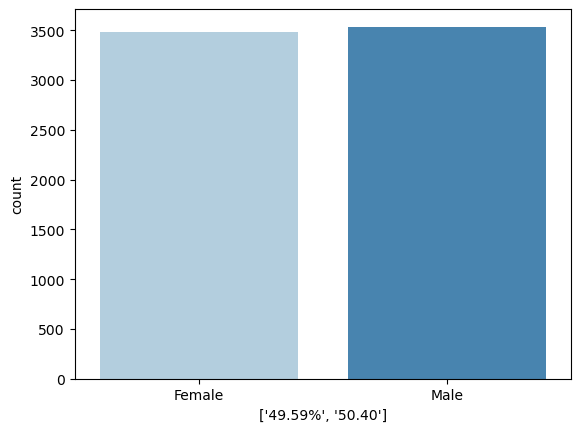

In [68]:
#comparison for the gender column
sns.countplot(df["gender"],palette="Blues")
plt.xlabel(["49.59%","50.40"])
plt.show()

The above visualization shows that the proportion of the male female population of the data is 50.40% and 49.59% respectively

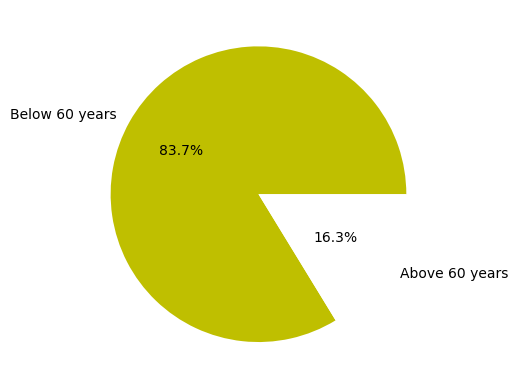

In [20]:
#comparison for the Seniorcitizen (above 60 years) column
lable=["Below 60 years","Above 60 years"]
plt.pie(df["SeniorCitizen"].value_counts(),labels=lable, autopct='%1.1f%%',colors="yw")
plt.show()

The above visualization shows that the proportion of the above 60 years age population of the data is 16.3%.

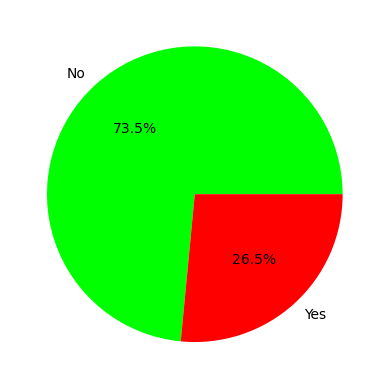

No     5154
Yes    1860
Name: Churn, dtype: int64


In [70]:
#comparison for the Churn column on which the classification will be perform by the model
plt.pie(df["Churn"].value_counts(normalize=True),labels=["No","Yes"], autopct='%1.1f%%')
plt.show()
print(df["Churn"].value_counts())

The main focus which the number of customer who are leaving the service is 1860 which is 26.5% of the total customer

## Checking the data that how much is service are been consumed by the customer

In [22]:
df["PhoneService"].value_counts(normalize=True)*100

Yes    90.305104
No      9.694896
Name: PhoneService, dtype: float64

In [23]:
df["InternetService"].value_counts(normalize=True)*100

Fiber optic    44.083262
DSL            34.416881
No             21.499857
Name: InternetService, dtype: float64

In [24]:
df["OnlineSecurity"].value_counts(normalize=True)*100

No     71.271742
Yes    28.728258
Name: OnlineSecurity, dtype: float64

In [25]:
df["OnlineBackup"].value_counts(normalize=True)*100

No     65.42629
Yes    34.57371
Name: OnlineBackup, dtype: float64

In [26]:
df["StreamingMovies"].value_counts(normalize=True)*100

No     61.063587
Yes    38.936413
Name: StreamingMovies, dtype: float64

The above analysis shows that the   
+ Phone Service was consumed by 90 percent of the customer in which 42.29% of the cusotmer were using the multiple lines  
+ Internet service was used by in which the company has Fiber optic used by (44.08%), DSL used by (34.41%) and (21.49%) of the customer were not using the internet service  
+ Online security was used by 28.72% of the customer  
+ Online Backup service was used by the 34.56% of the customer  
+ Movies were streamed by 38.93% of the customer   

## Finding the outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


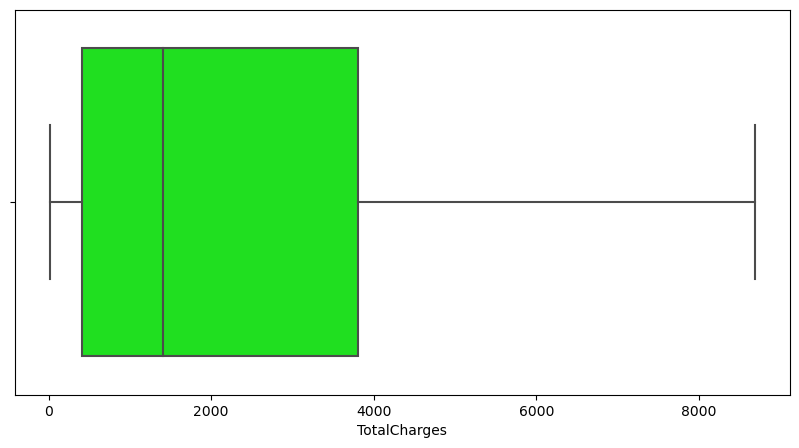

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(df["TotalCharges"],showfliers=True,)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

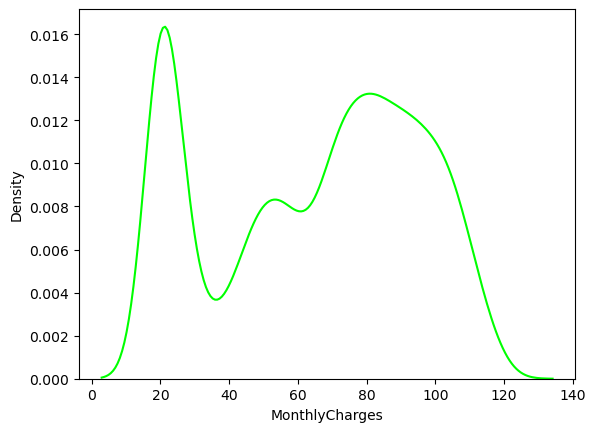

In [28]:
sns.distplot(df["MonthlyCharges"],hist=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

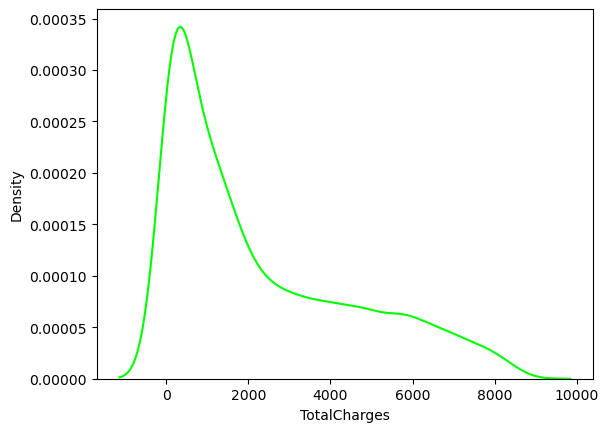

In [29]:
sns.distplot(df["TotalCharges"],hist=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

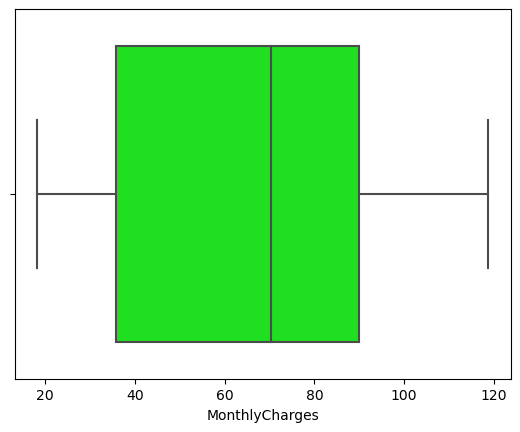

In [30]:
sns.boxplot(df["MonthlyCharges"])

From the above representaion of the box plot and the hist plot the observations are:-  
+ There are no outliers in the Totalcharges and Monthlycharges columns  
+ Also the Totalcharges columns is shrink toward the lower side which means that the more customer pay the charge in that zone  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No     4915
Yes    2099
Name: Dependents, dtype: int64


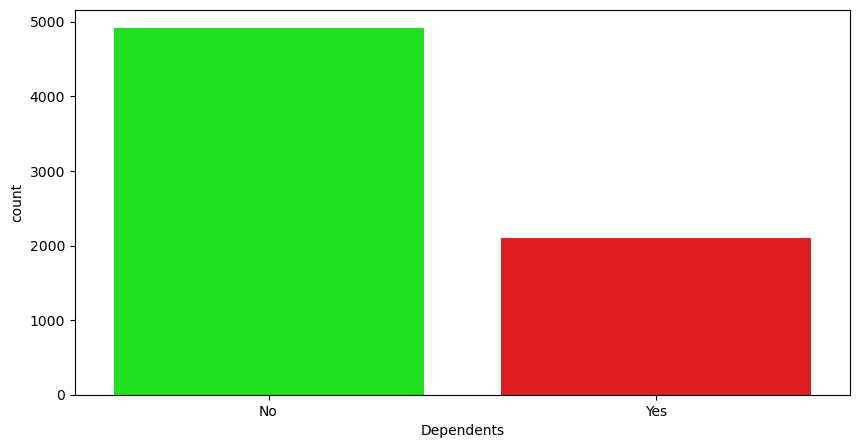

In [31]:
#checking the dependent column because if the consumer have multiple dependent then the usage might get increase 
plt.figure(figsize=(10,5))
sns.countplot(df["Dependents"])
print(df["Dependents"].value_counts())

The customer which are present in the dataset only 2099 have dependent who might use the service 

# Bivariate Analysis

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

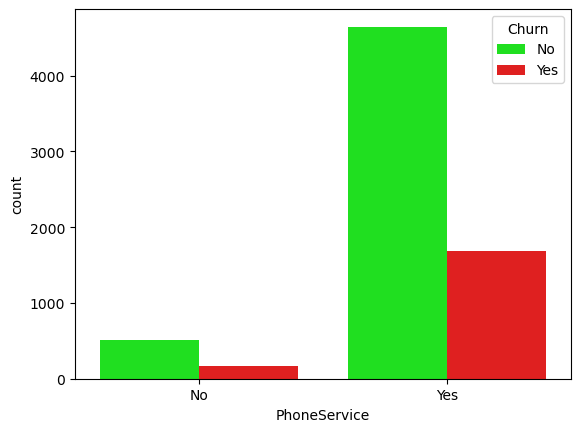

In [32]:
#No. of people using the phoneservice who churn out
sns.countplot(x=df["PhoneService"],hue=df["Churn"])

In [33]:
df["PhoneService"].value_counts()
phone_service=pd.crosstab(df["PhoneService"],df["Churn"])
print(phone_service)

Churn           No   Yes
PhoneService            
No             510   170
Yes           4644  1690


In [34]:
#percentage of people churn the sevice who were using the phone services is 
people_using_the_phone =(1690*100)/(4644+1690)
#Similarly the percent of people not using the phoneservice and left the service is
people_not_using_the_phone=(170*100)/(510+170)
print(people_not_using_the_phone,"% not using the phone service left the service ")
print(round(people_using_the_phone,ndigits=2),"% using the phone service left the service")

25.0 % not using the phone service left the service 
26.68 % using the phone service left the service


In [35]:
#No. of people using the internet service who churn out
print(df["InternetService"].value_counts())
Internet_Service=pd.crosstab(df["InternetService"],df["Churn"])
print(Internet_Service)
#percentage of people churn the sevice who were using the DSL services is 
people_using_the_DSL =(457*100)/(2414)
#Similarly the percent of people not using the internetservice and left the service is
people_not_using_the_internet=(110*100)/(1509)
print(round(people_not_using_the_internet,ndigits=2),"% not using the internet service left the service ")
print(round(people_using_the_DSL,ndigits=2),"% using the DSL service left the service")
#percentage of people churn the sevice who were using the Fiberoptic services is 
people_using_the_Fiberoptic =(1293*100)/(3092)
print(round(people_using_the_Fiberoptic,ndigits=2),"% using the Fiberoptic service left the service")

Fiber optic    3092
DSL            2414
No             1508
Name: InternetService, dtype: int64
Churn              No   Yes
InternetService            
DSL              1957   457
Fiber optic      1799  1293
No               1398   110
7.29 % not using the internet service left the service 
18.93 % using the DSL service left the service
41.82 % using the Fiberoptic service left the service


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

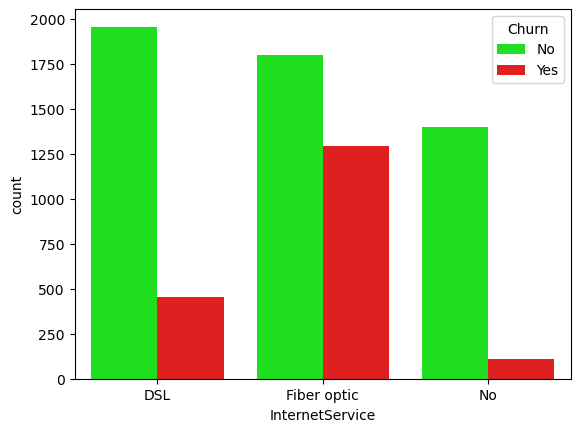

In [36]:
#visual representation for the internet using and churn consumer
sns.countplot(df["InternetService"],hue=df["Churn"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

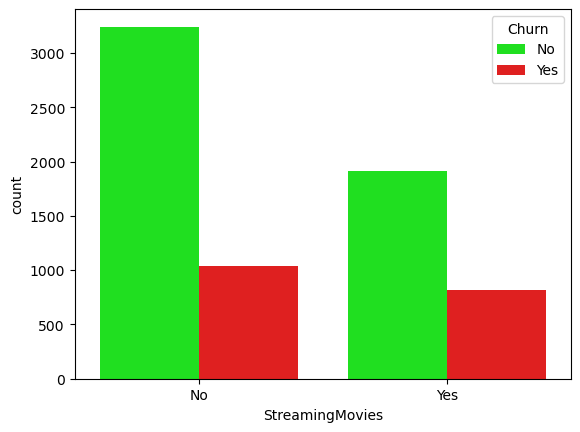

In [37]:
#visual representation for the internet using and churn consumer
sns.countplot(df["StreamingMovies"],hue=df["Churn"])

In [38]:
pd.crosstab(df["StreamingMovies"],df["Churn"])
percent_of_left = (818*100)/(1913+818)
print(percent_of_left,"% of the customer using the streaming movies service left the service")

29.952398388868545 % of the customer using the streaming movies service left the service


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

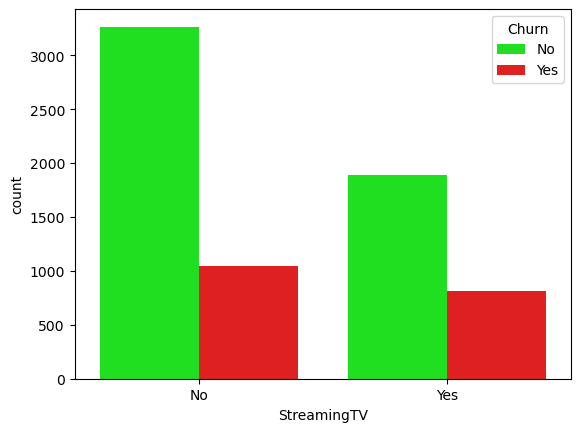

In [39]:
sns.countplot(df["StreamingTV"],hue=df["Churn"])

Number of people who left the stream movie service is approx same as the number of people who were streaming TV

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

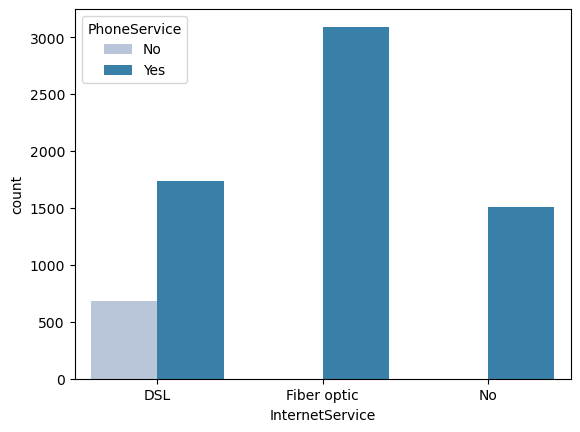

In [41]:
#comparison between the feature of the df
sns.countplot(df["InternetService"],hue=df["PhoneService"],palette="PuBu")

In [42]:
#comparison between the paperless billing and the churn consumer
print(df["PaperlessBilling"].value_counts(normalize=True)*100)
print(pd.crosstab(df["PaperlessBilling"],df["Churn"]))

Yes    59.309952
No     40.690048
Name: PaperlessBilling, dtype: float64
Churn               No   Yes
PaperlessBilling            
No                2387   467
Yes               2767  1393


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

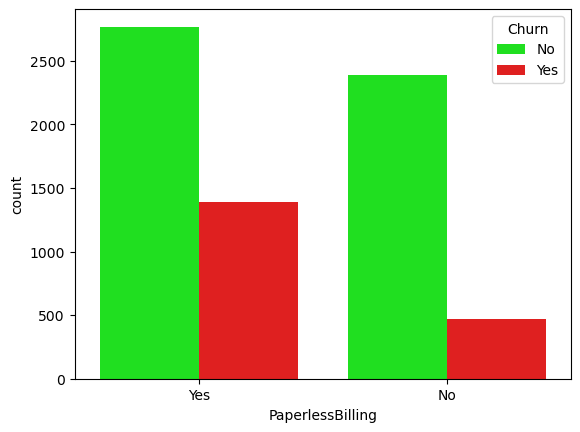

In [43]:
sns.countplot(df["PaperlessBilling"],hue=df["Churn"])

According to the above representation 60% of the people opted for paperless billing facility   
Out of which 33.50% of the people left the service

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

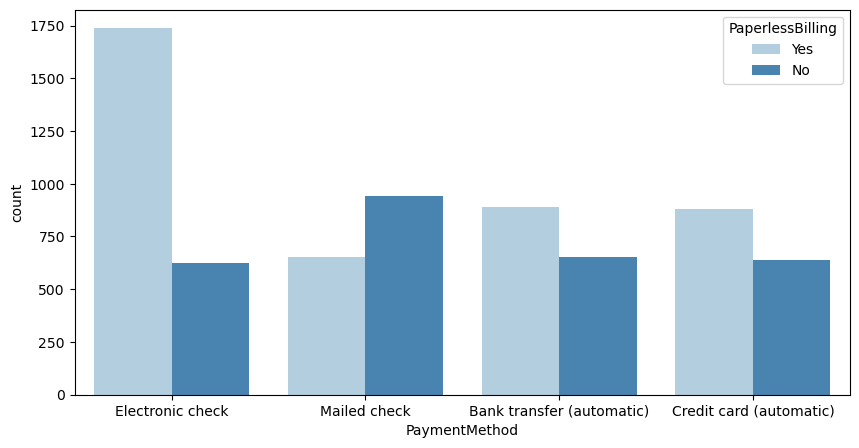

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(df["PaymentMethod"],hue=df["PaperlessBilling"],palette="Blues")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

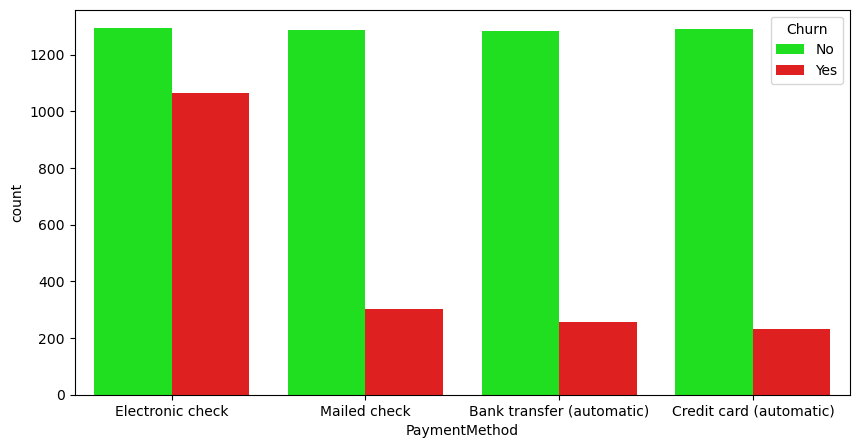

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df["PaymentMethod"],hue=df["Churn"])

In [46]:
pd.crosstab(df["PaymentMethod"],df["Churn"])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1066
Mailed check,1287,304


In [47]:
#No of people paying through the electronic check left the service 
electronic_check_left = (1066*100)/(1294+1066)
print(round(electronic_check_left,ndigits=2),"% of people using the electronic check medium who left the service")

45.17 % of people using the electronic check medium who left the service


In [48]:
df1=pd.crosstab(df["numTechTickets"],df["Churn"])
df1=df1.iloc[1:,:]
print(df1)

Churn           No  Yes
numTechTickets         
1               88  168
2               75  126
3               50  101
4               41   92
5               29   87
6               13   59
7                1   28
8                0   11
9                0    1


In [49]:
# Checking the No. of raised ticket and No. of admin ticket raised
column_sum = 0
for value in df1['No']:
    column_sum += value
column_sum1 = 0
for value in df1['Yes']:
    column_sum1 += value
total=column_sum+column_sum1
tech_ticket_raised_and_left = column_sum1*100/total
print(round(tech_ticket_raised_and_left,ndigits=2),"% (673 customer) who raised the tech ticket left the service out of 970 ticket raised")

69.38 % (673 customer) who raised the tech ticket left the service out of 970 ticket raised


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='numTechTickets', ylabel='count'>

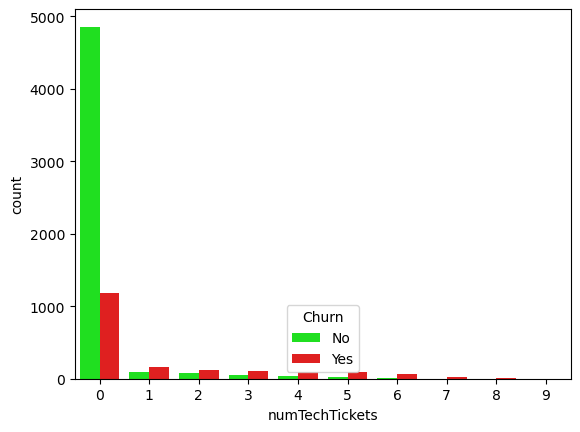

In [50]:
sns.countplot(df["numTechTickets"],hue=df["Churn"])

In [51]:
pd.crosstab(df["numAdminTickets"],df["Churn"])

Churn,No,Yes
numAdminTickets,,
0,4244,1573
1,175,47
2,181,62
3,195,67
4,181,47
5,178,64


# Transfromation and Model Preparation

In [52]:
X=df.drop("Churn",axis=1)  #selecting the input
y = df["Churn"]  #selecting the target
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=20) #creating the train data and test data

In [53]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7014, dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder  # Importing the LabelEncoder from sklearn.preprocessing module

le = LabelEncoder()  # Creating an instance of the LabelEncoder class

le.fit(y_train)  # Fitting the LabelEncoder to the y_train data
# This step assigns a unique integer label to each unique category in y_train

y_train = le.transform(y_train)  # Transforming y_train using the fitted LabelEncoder
# This step replaces the original categories in y_train with their corresponding integer labels

y_test = le.transform(y_test)  # Transforming y_test using the fitted LabelEncoder
# This step replaces the original categories in y_test with their corresponding integer labels


In [55]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

### Columns Tranformation

In [56]:
categories = [["No", "Yes"], ["No", "Yes"]]  # List of categories for each feature

oe = ColumnTransformer([
    ("oe", OrdinalEncoder(categories=categories), [2, 3])
], remainder="passthrough")


In [57]:
ohe = ColumnTransformer([
    ("ohe",OneHotEncoder(sparse=False,drop="first"),[2,4,5,6,7,8,9,10,11,12,13,14])
],remainder="passthrough")

In [58]:
mm = ColumnTransformer([
    ("mm", MinMaxScaler(),slice(0,22) )
], remainder="passthrough")

### Feature Selection

In [59]:
feature = SelectKBest(score_func=chi2,k=9)

## Model Training

In [83]:
# model = DecisionTreeClassifier(random_state=20)
# model = LogisticRegression(max_iter=100,random_state=112,penalty="l2")
model = RandomForestClassifier(random_state=5,criterion="gini")

# Creating the Pipeline

In [84]:
pipe = Pipeline([
    ("oe",oe),
    ("ohe",ohe),
    ("mm",mm),
    ("feature",feature),
    ("model",model)
])

In [85]:
transfrom1=pipe.fit(X_train,y_train) #fitting the X_train y_train in the pipe which will convert and train the model

C:\Users\Alok\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
y_pred = pipe.predict(X_test) #predicting the X_test

In [87]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test)*100)            #Getting the accuracy of the model

80.61297220242338


## Logistic Regression highest accuracy = 79.97
## Random Forest highest accuracy = 80.61
## DecisionTree Classifier highest accuracy = 80.25

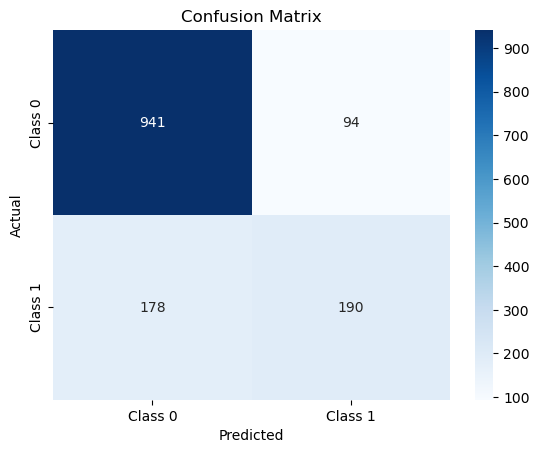

In [88]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Display the plot
plt.show()

In [89]:
precision_score(y_test, y_pred)

0.6690140845070423

In [90]:
transfrom1

Pipeline(steps=[('oe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  [2, 3])])),
                ('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14])])),
                ('mm',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mm', MinMaxScaler(),
                                                  slice(0, 22, None))])),
                ('feature',
                 SelectKBest(k=9,
                             score_func=<function chi2 at 0x000001A24B2AB280>)),
                ('model', RandomForestClassifier(random_state=5))])